# About our Dataset 
The Mall customers dataset contains information about people visiting the mall. 
The dataset has gender, customer id, age, annual income, and spending score. 
It collects insights from the data and group customers based on their behaviors.

# Our Target
Segment the customers based on the age, gender, interest. Customer segmentation is an important practise of dividing customers base into individual groups that are similar. It is useful in customised marketing.

### Importing all the important libray

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


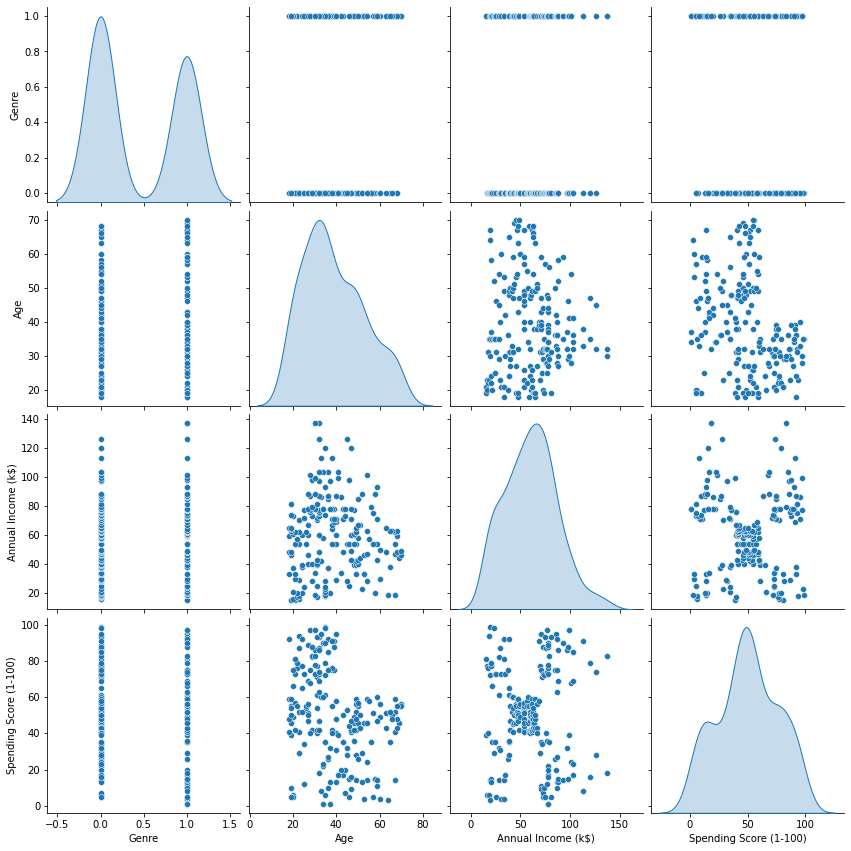

In [75]:
sns.pairplot(df  , diag_kind = 'kde' , height = 3)

In [7]:
#df.iloc[:,1:].corr()
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

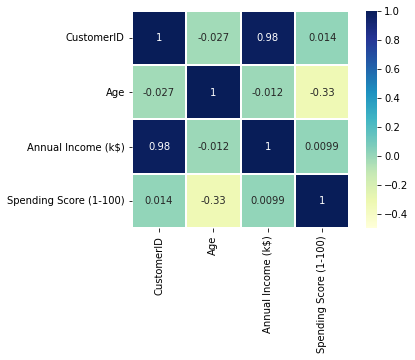

In [8]:
sns.heatmap(df.corr() , cmap = 'YlGnBu', annot = True , linewidths = 2, vmax = 1, vmin = -0.5 , square= True)

In [23]:
df = df.iloc[:,1:]
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [25]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Genre'] = encode.fit_transform(df['Genre'])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [27]:
X = df.iloc[:,1:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
'''from sklearn.model_selection import train_test_split

x_train,x_test ,y_train , y_test = train_test_split(x , y ,random_state = 5 )'''

In [30]:
from sklearn.cluster import KMeans
temp = []

for i in range(1,11):
    km = KMeans(n_clusters = i , init='k-means++')
    km.fit(X)
    temp.append(km.inertia_)

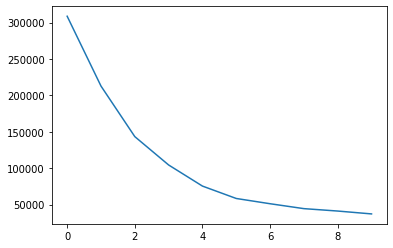

In [31]:
plt.plot(temp)

In [32]:
kmeans = KMeans(n_clusters= 5 ,  init='k-means++')
label = kmeans.fit_predict(X)

In [33]:
kmeans.cluster_centers_[:]

array([[43.12658228, 54.82278481, 49.83544304],
       [40.32432432, 87.43243243, 18.18918919],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [25.27272727, 25.72727273, 79.36363636]])

In [34]:
label

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [79]:
X['Spending Score (1-100)'][label == 0].values

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35], dtype=int64)

In [80]:
X['Annual Income (k$)'][label == 0].values

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71], dtype=int64)

<AxesSubplot:>

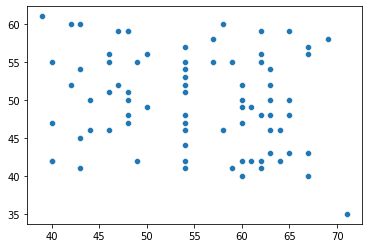

In [95]:
sns.scatterplot(x = X['Annual Income (k$)'][label == 0].values , y = X['Spending Score (1-100)'][label == 0].values)

In [108]:
kmeans.cluster_centers_

array([[43.12658228, 54.82278481, 49.83544304],
       [40.32432432, 87.43243243, 18.18918919],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [25.27272727, 25.72727273, 79.36363636]])

In [133]:
cc = kmeans.cluster_centers_
cc_1 = np.hsplit(cc,3)
cc_1

[array([[43.12658228],
        [40.32432432],
        [45.2173913 ],
        [32.69230769],
        [25.27272727]]),
 array([[54.82278481],
        [87.43243243],
        [26.30434783],
        [86.53846154],
        [25.72727273]]),
 array([[49.83544304],
        [18.18918919],
        [20.91304348],
        [82.12820513],
        [79.36363636]])]

In [139]:
cc_1[0].reshape(1,-1)[0]

array([43.12658228, 40.32432432, 45.2173913 , 32.69230769, 25.27272727])

<AxesSubplot:>

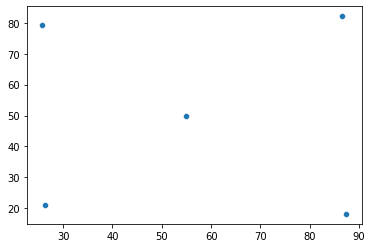

In [141]:
sns.scatterplot(x= cc_1[1].reshape(1,-1)[0] ,y = cc_1[2].reshape(1,-1)[0])

<AxesSubplot:>

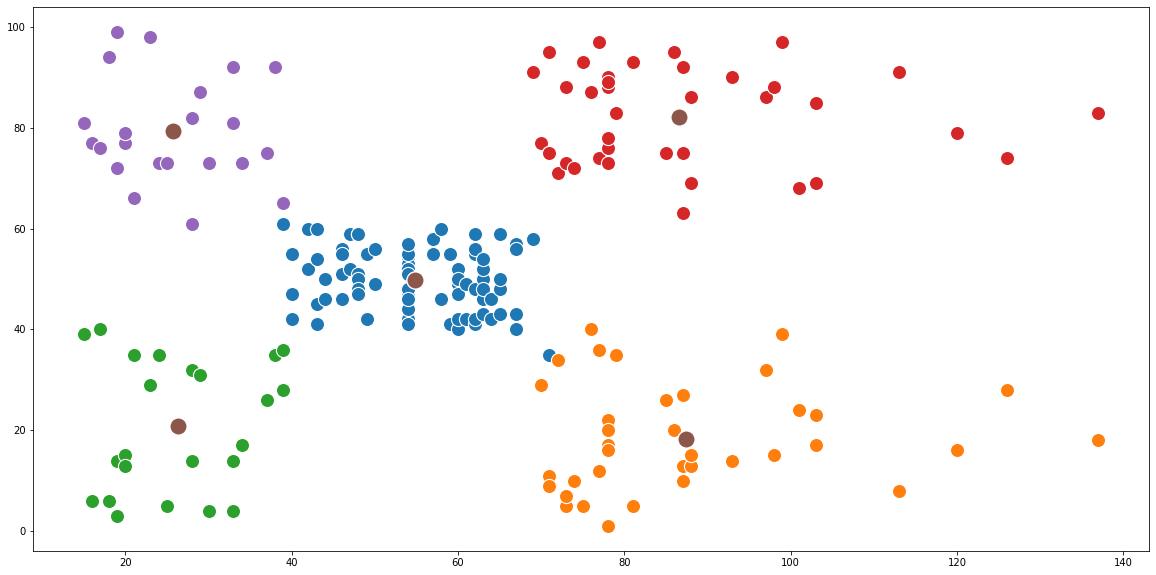

In [144]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 10)
for i in range(0,5):
    sns.scatterplot(x = X['Annual Income (k$)'][label == i].values , y = X['Spending Score (1-100)'][label == i].values, s = 200)
sns.scatterplot(x= cc_1[1].reshape(1,-1)[0] ,y = cc_1[2].reshape(1,-1)[0] , s = 300 )

In [87]:
import plotly.express as px

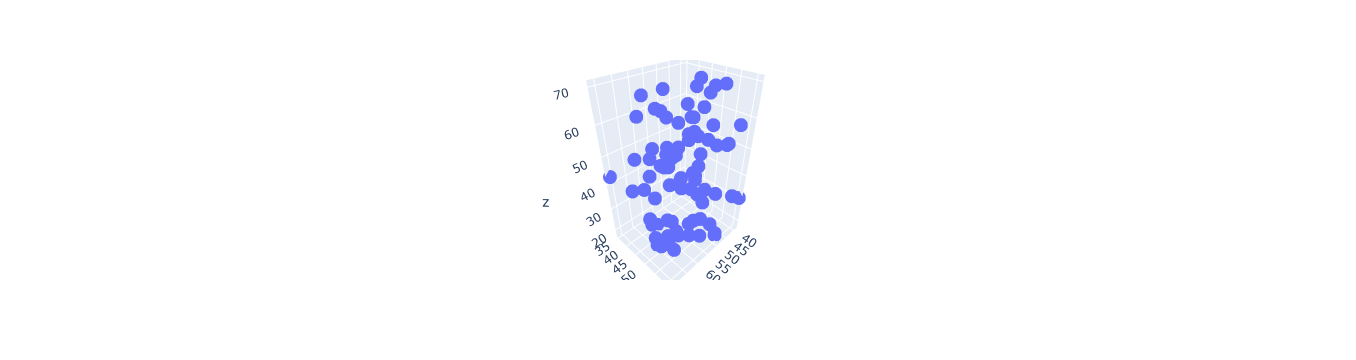

In [85]:
px.scatter_3d(x = X['Annual Income (k$)'][label == 0].values , y = X['Spending Score (1-100)'][label == 0].values , z = X['Age'][label == 0].values)